In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
import requests
url = 'https://www.dropbox.com/scl/fi/f2dooq1g1cbojkfpi93dc/Bank-marketing-campaign-CSV.csv?rlkey=dazyqp68mohqlqmo4o8yyrdd8&st=b60m9nc0&dl=1'
res = requests.get(url)
with open('bank_campaign_sheet.csv','wb') as file:
    file.write(res.content)




In [ ]:
 # Read the CSV file into a DataFrame
bank_campaign = pd.read_csv('bank_campaign_sheet.csv')

# Display the first few rows of the DataFrame
bank_campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Display the columns in the dataset
print(bank_campaign.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
# Display the data types of the columns
bank_campaign.dtypes


,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
# Display summary statistics
bank_campaign.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Check for missing values
print('Data columns with null values:', bank_campaign.isnull().sum(), sep='\n')


Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<Axes: >

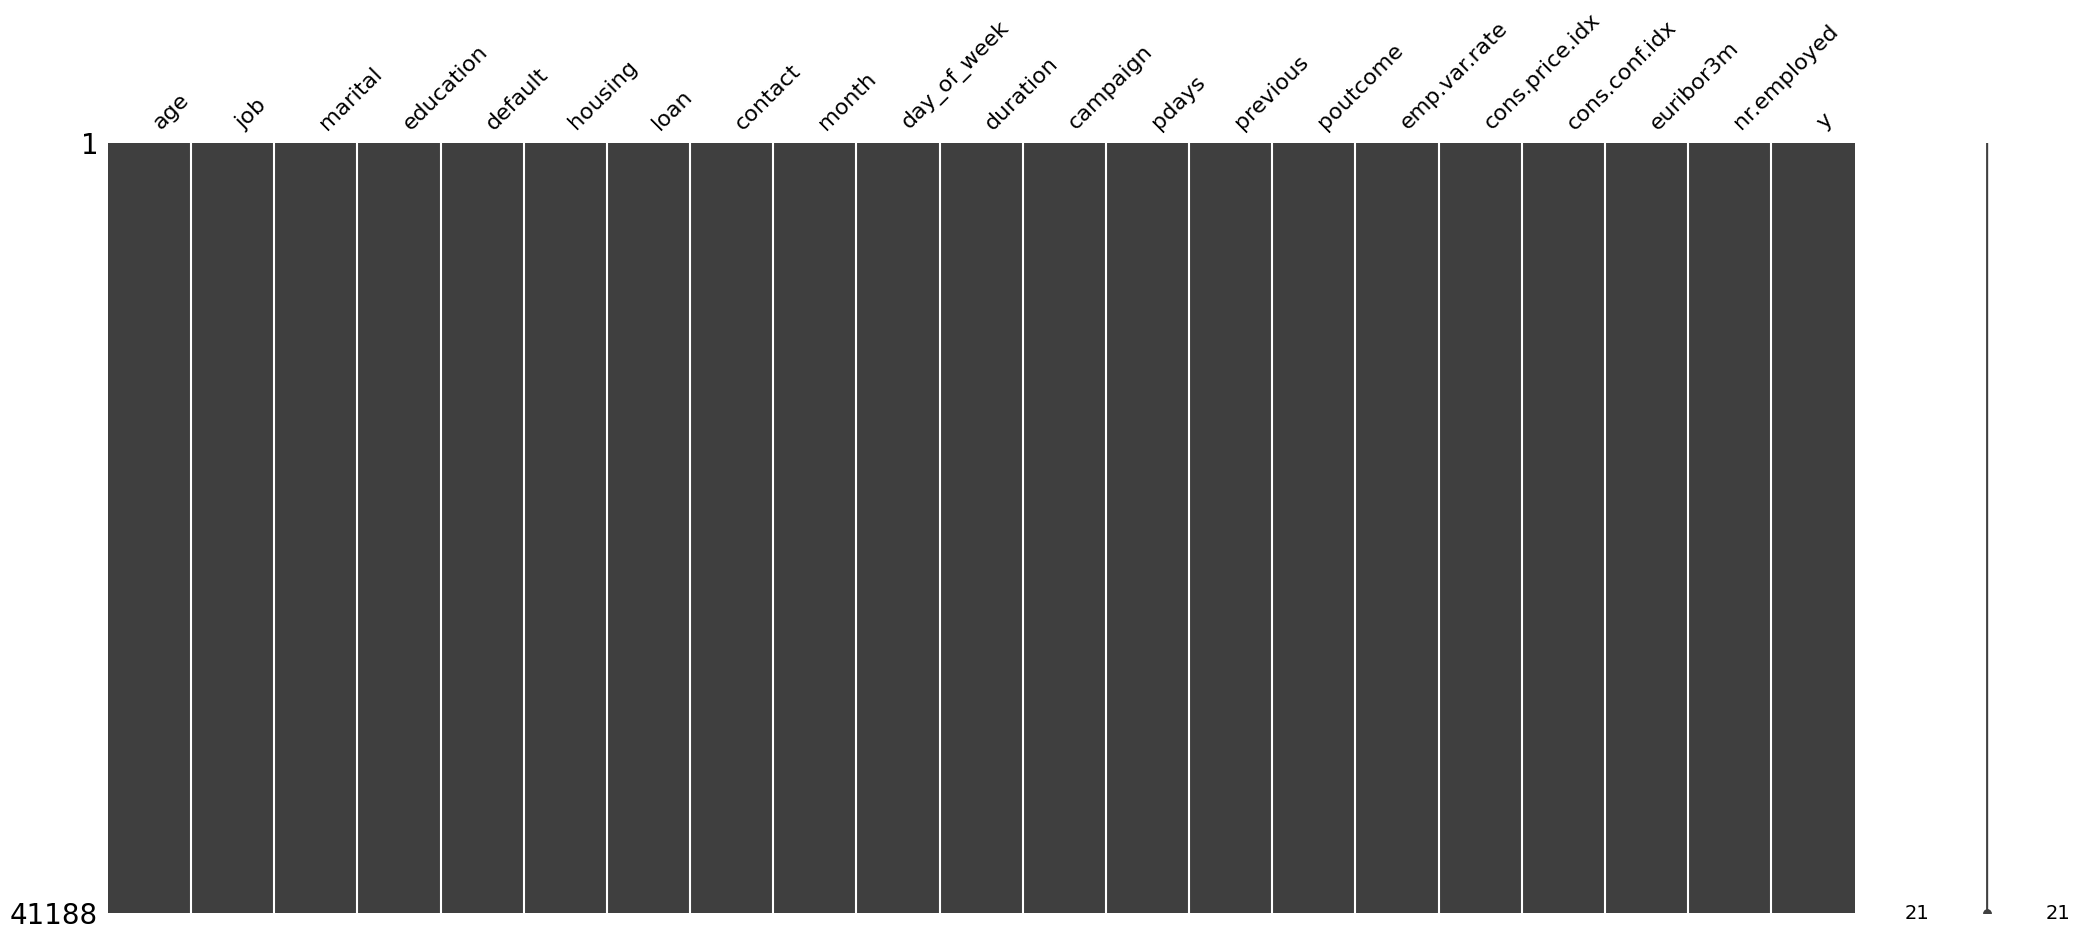

In [ ]:
# Visualize missing data using missingno
import missingno as msno
msno.matrix(bank_campaign)

In [ ]:
bank_campaign.shape

(41188, 21)

In [ ]:
#Checking out the categories and their respective counts in each feature
# Checking out the categories and their respective counts in each feature
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']:
    print(f"{column.capitalize()}:")
    print(bank_campaign[column].value_counts())
    print("-" * 40)

Job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
Marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------
Education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
----------------------------------------
Default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
----------------------------------------
Housing:
housing
yes        21576
no 

In [ ]:
import pandas as pd

# Encoding the target variable 'y'
bank_campaign['y_encoded'] = bank_campaign['y'].apply(lambda x: 1 if x == 'yes' else 0)


# Verify encoding of the target variable
print(bank_campaign[['y', 'y_encoded']].head())


    y  y_encoded
0  no          0
1  no          0
2  no          0
3  no          0
4  no          0


In [ ]:
# One-Hot Encode categorical variables
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                         'contact', 'month', 'day_of_week', 'poutcome']
bank_campaign_encoded = pd.get_dummies(bank_campaign, columns=categorical_variables, drop_first=True)


print(bank_campaign_encoded.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ... month_may  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...      True      False      False   
1          -36.4      4.857       5191.0  ...      True      False      False   
2          -36.4      4.857       5191.0  ...      True      False      False   
3          -36.4      4.857       5191.0  ...      True      False      False   
4          -36.4      4.857       5191.0  ...      True      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  da

In [ ]:
# Handling outliers in numerical features
# Handling outliers using the IQR method
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for feature in numerical_features:
    Q1 = bank_campaign_encoded[feature].quantile(0.25)
    Q3 = bank_campaign_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bank_campaign_encoded = bank_campaign_encoded[(bank_campaign_encoded[feature] >= lower_bound) &
                                                  (bank_campaign_encoded[feature] <= upper_bound)]

# Display the updated shape after handling outliers
print("Updated Dataset Shape:", bank_campaign_encoded.shape)

Updated Dataset Shape: (24919, 55)


In [ ]:
#VISUALIZATION ON DATA FRAME

#Question 1:What is the age distribution of customers in the dataset?
def plot_age_distribution(bank_campaign):
    """
    Plot the distribution of customer ages.

    :param df: pandas DataFrame containing the dataset
    :return: None, displays the plot
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(bank_campaign['age'], bins=30, kde=True, color='skyblue')
    plt.title('Age Distribution of Customers')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()


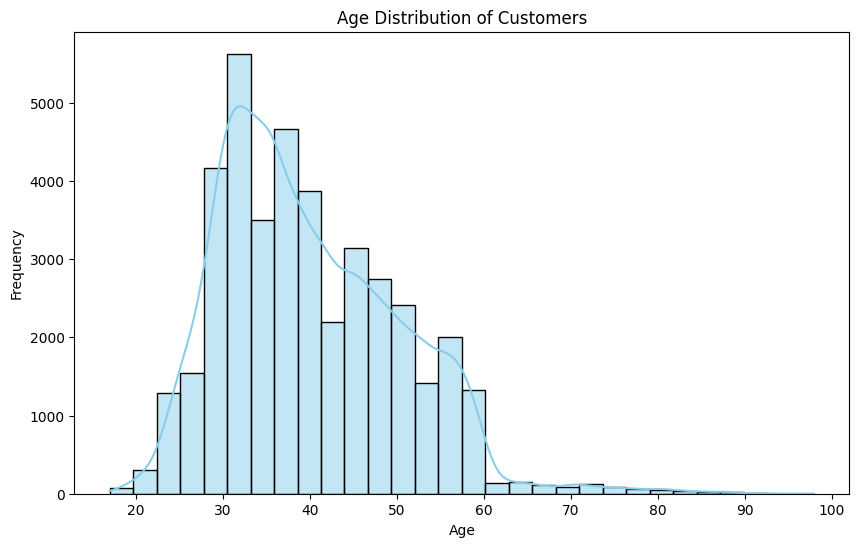

In [ ]:
plot_age_distribution(bank_campaign)


## Insights:
### The customer age distribution is concentrated around young to middle-aged adults, particularly between 25 and 40 years old. This suggests that the majority of the bank's customer base falls within this age group.

## Recommendation:
### Tailor marketing strategies to target this predominant age group by offering financial products that align with their life stages, such as mortgage products, investment opportunities, and savings plans.

In [ ]:
# QUESTION 2: Which job types show the highest success rates in the marketing campaign?


def plot_job_success_rates(df, job_column='job', target_column='y'):
    """
    This function calculates the success rates of a marketing campaign by job type and plots the results.

    :param df: pandas DataFrame containing the dataset
    :param job_column: string, the name of the column representing job types
    :param target_column: string, the name of the column representing the target variable ('yes' or 'no')
    :return: None, displays the plots
    """
    # Grouping by job type and target variable to count the occurrences of "yes" and "no"
    job_response = df.groupby([job_column, target_column]).size().unstack().fillna(0)

    # Renaming columns to 'No' and 'Yes' for clarity
    job_response.columns = ['No', 'Yes']

    # Calculating the success rate for each job type
    job_response['Success Rate'] = job_response['Yes'] / (job_response['Yes'] + job_response['No'])

    # Display the job response counts and success rates
    print(job_response)

    # Plotting the stacked bar chart for response distribution by job type
    plt.figure(figsize=(14, 8))
    job_response[['No', 'Yes']].plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(14, 8))

    plt.title('Term Deposit Response by Job Type')
    plt.xlabel('Job Type')
    plt.ylabel('Count of Responses')
    plt.xticks(rotation=45)
    plt.legend(title='Response')
    plt.show()

    # Plotting the success rate by job type
    plt.figure(figsize=(14, 8))
    sns.barplot(x=job_response.index, y=job_response['Success Rate'], palette='viridis')

    plt.title('Success Rate by Job Type')
    plt.xlabel('Job Type')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)
    plt.show()



                 No   Yes  Success Rate
job                                    
admin.         9070  1352      0.129726
blue-collar    8616   638      0.068943
entrepreneur   1332   124      0.085165
housemaid       954   106      0.100000
management     2596   328      0.112175
retired        1286   434      0.252326
self-employed  1272   149      0.104856
services       3646   323      0.081381
student         600   275      0.314286
technician     6013   730      0.108260
unemployed      870   144      0.142012
unknown         293    37      0.112121


<Figure size 1400x800 with 0 Axes>

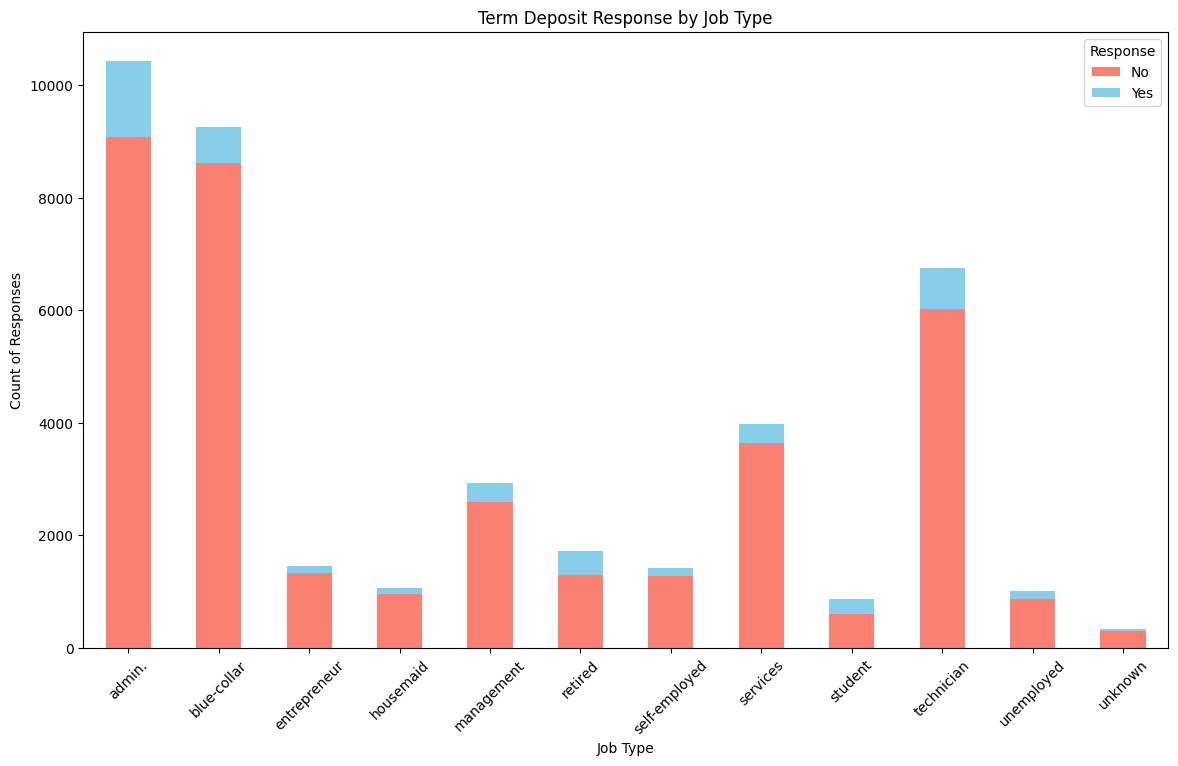

<ipython-input-19-6ccc182e9391>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_response.index, y=job_response['Success Rate'], palette='viridis')


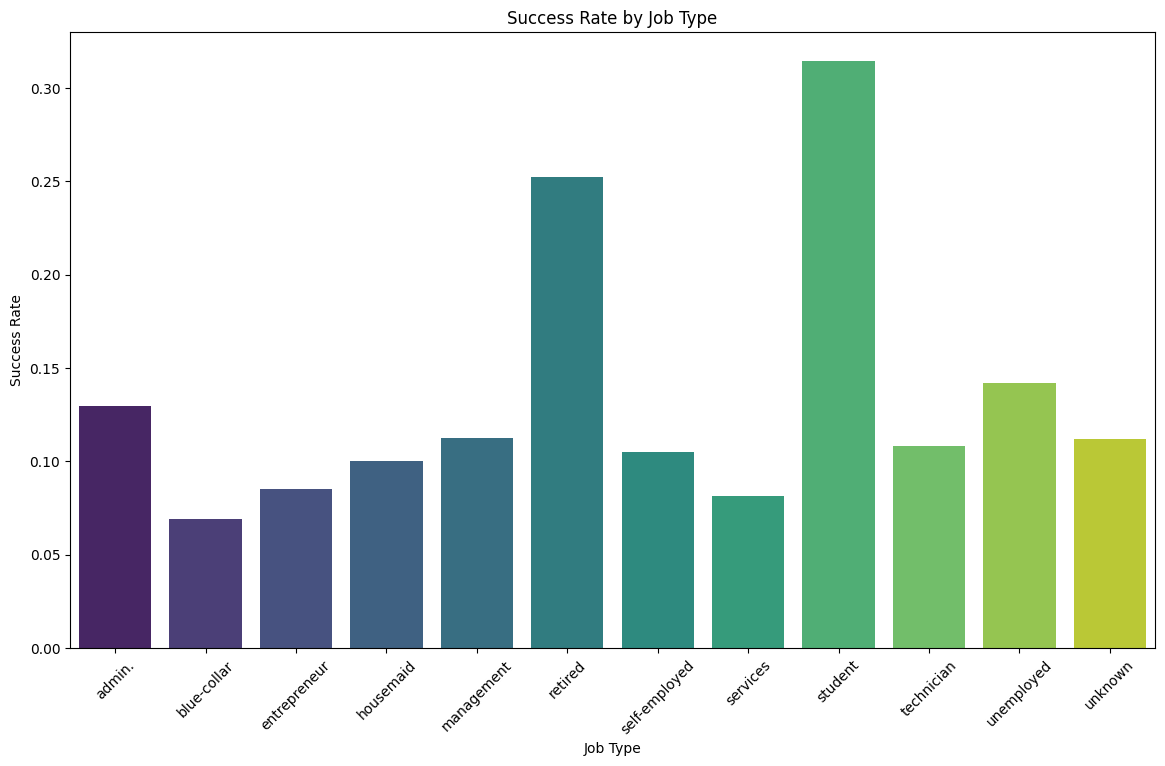

In [ ]:
plot_job_success_rates(bank_campaign)

## Insights:

### Retired individuals and students have the highest campaign success rates, indicating they are more receptive to term deposit offers compared to other job types like blue-collar workers and administrative staff.

## Recommendation:
### Focus marketing efforts on job types with higher success rates, such as retirees and students, by tailoring messages that resonate with their financial goals and needs.

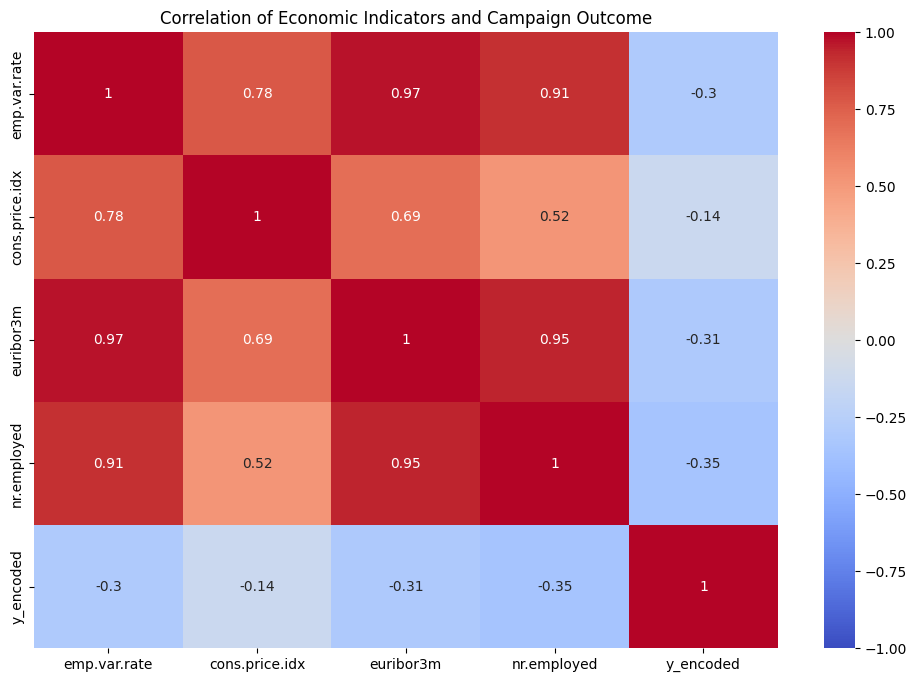

In [ ]:
# Question 3:  How do economic indicators impact the outcomes of the marketing campaign?

economic_indicators = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(12, 8))
sns.heatmap(bank_campaign[economic_indicators + ['y_encoded']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Economic Indicators and Campaign Outcome')
plt.show()



## Insight:
### The economic indicators have very weak correlations with the campaign outcomes, suggesting that these factors do not strongly influence whether customers subscribe to the term deposit.

## Recommendation:
### Since economic indicators have minimal impact on campaign success, consider focusing more on customer-specific factors such as demographics, past behavior, and personal financial situations to drive campaign success.


education
illiterate             0.222222
unknown                0.145003
university.degree      0.137245
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y_encoded, dtype: float64


<ipython-input-22-d81add16dacc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_success_rate.index, y=education_success_rate.values, palette='viridis')


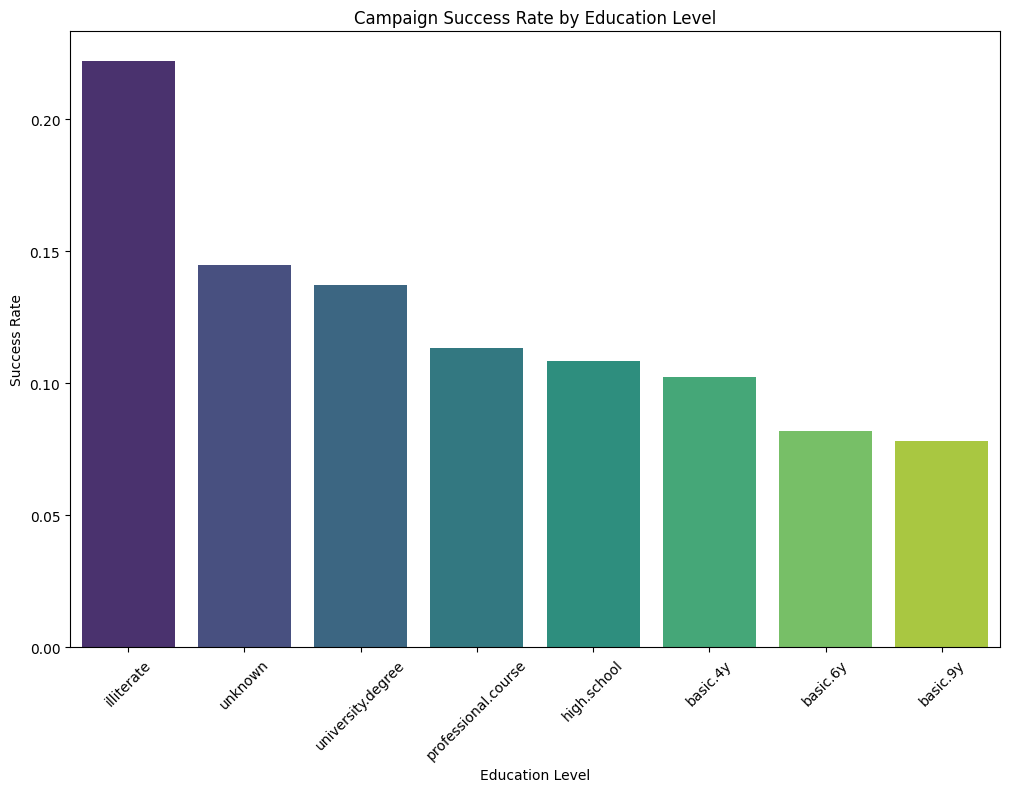

In [ ]:
#Question 4: Is there a significant variation in campaign success across different education levels?

# Calculate the campaign success rate by education level
education_success_rate = bank_campaign.groupby('education')['y_encoded'].mean().sort_values(ascending=False)

# Display the success rates
print(education_success_rate)

# Plotting the success rate by education level
plt.figure(figsize=(12, 8))
sns.barplot(x=education_success_rate.index, y=education_success_rate.values, palette='viridis')
plt.title('Campaign Success Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()


## Insights:

### Illiterate individuals have the highest campaign success rate, followed by those with a university degree. Other education levels have lower success rates, indicating a potential gap in targeting these groups effectively.

## Recommendation:
### Develop targeted campaigns for illiterate individuals, emphasizing simplicity and accessibility. For university graduates, highlight the advanced benefits of term deposits. Explore why lower-educated groups are less responsive and adjust marketing strategies accordingly.

In [ ]:
#Question 5: Does the presence of a housing or personal loan affect a customer's decision to subscribe to a term deposit?

def plot_loan_success_rates(df, housing_column='housing', loan_column='loan', target_column='y'):
    """
    Analyze and plot the impact of having a housing or personal loan on the success rate of subscribing to a term deposit.

    :param df: pandas DataFrame containing the dataset
    :param housing_column: string, the name of the column representing housing loan status
    :param loan_column: string, the name of the column representing personal loan status
    :param target_column: string, the name of the column representing the target variable ('yes' or 'no')
    :return: None, displays the plots
    """
    # Analyzing the impact of having a housing loan on the success rate
    housing_response = df.groupby([housing_column, target_column]).size().unstack().fillna(0)
    housing_response.columns = ['No', 'Yes']
    housing_response['Success Rate'] = housing_response['Yes'] / (housing_response['Yes'] + housing_response['No'])

    # Analyzing the impact of having a personal loan on the success rate
    loan_response = df.groupby([loan_column, target_column]).size().unstack().fillna(0)
    loan_response.columns = ['No', 'Yes']
    loan_response['Success Rate'] = loan_response['Yes'] / (loan_response['Yes'] + loan_response['No'])

    # Plotting the success rate by housing loan status
    plt.figure(figsize=(12, 6))
    sns.barplot(x=housing_response.index, y=housing_response['Success Rate'], palette='viridis')
    plt.title('Success Rate by Housing Loan Status')
    plt.xlabel('Housing Loan')
    plt.ylabel('Success Rate')
    plt.show()

    # Plotting the success rate by personal loan status
    plt.figure(figsize=(12, 6))
    sns.barplot(x=loan_response.index, y=loan_response['Success Rate'], palette='viridis')
    plt.title('Success Rate by Personal Loan Status')
    plt.xlabel('Personal Loan')
    plt.ylabel('Success Rate')
    plt.show()


<ipython-input-23-310f9ef2ca7b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_response.index, y=housing_response['Success Rate'], palette='viridis')


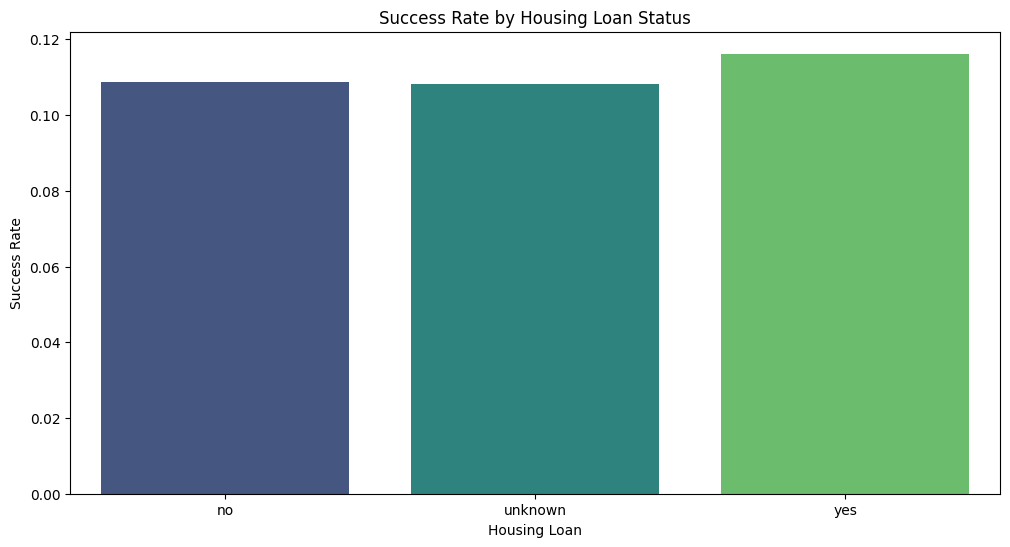

<ipython-input-23-310f9ef2ca7b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_response.index, y=loan_response['Success Rate'], palette='viridis')


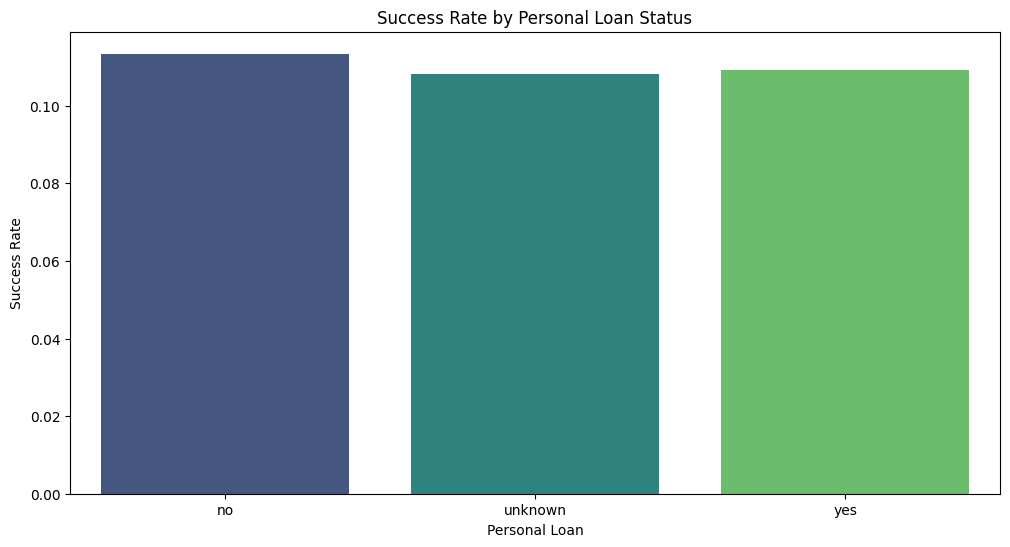

In [ ]:
plot_loan_success_rates(bank_campaign)

## This Visualization provides valuable insights into how existing financial commitments influence customer decisions, helping the bank refine their marketing strategy accordingly.


## Impact of Housing Loans:
### Customers with a housing loan are slightly more likely to subscribe to a term deposit compared to those without a housing loan.
### Customers with an unknown housing loan status have the lowest success rate, indicating that incomplete data may correlate with lower campaign effectiveness.

## Impact of Personal Loans:
### Customers without a personal loan have the highest success rate for subscribing to a term deposit.
### As with housing loans, customers with unknown personal loan statuses show a lower success rate, suggesting that missing information might negatively impact conversions.


## Recommendations:
## Focus on Customers with Housing Loans:

### Target marketing efforts toward customers with housing loans, as they show a higher likelihood of subscribing. Highlight the benefits of building savings alongside managing their existing financial commitments.

## Improve Data Quality:
### Address the lower success rates associated with unknown loan statuses by improving data collection and ensuring accurate information. This will help in better segmenting and targeting customers.

## Leverage High Success Among Those Without Personal Loans:
### Emphasize the advantages of term deposits to customers without personal loans, who may have more disposable income and are more inclined to save or invest.


In [ ]:
# Check the distribution of the target variable (showing if the dataset is balanced)
class_distribution = bank_campaign['y_encoded'].value_counts(normalize=True) * 100
print("Class distribution (in percentage):\n", class_distribution)

Class distribution (in percentage):
 y_encoded
0    88.734583
1    11.265417
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# Define features and target
X = bank_campaign.drop(['y', 'y_encoded'], axis=1)
y = bank_campaign['y_encoded']

# One-Hot Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the distribution after SMOTE
balanced_class_proportion = pd.Series(y_balanced).value_counts(normalize=True) * 100
print(balanced_class_proportion)

y_encoded
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:
#Predictive Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)


In [ ]:
#Logistic regression
mydf= bank_campaign.replace({True: 1, False: 0})
mydf


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


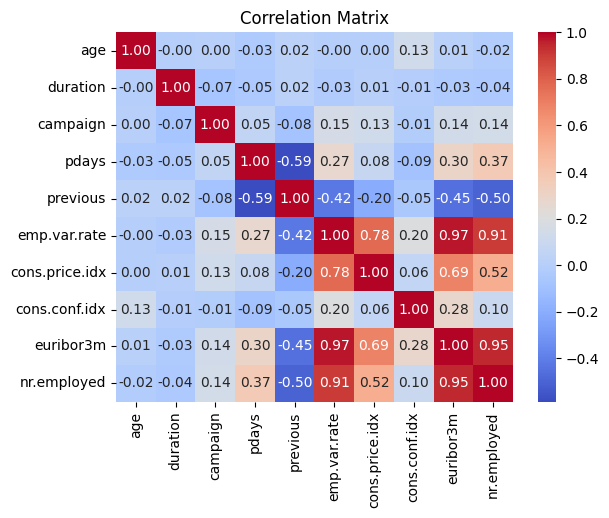

In [ ]:
#Check the colinearity of numerical variables
mydf_num= mydf[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

# Calculate correlation matrix
correlation_matrix = mydf_num.corr()

# Construct correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate VIF to find out colinear variables

vif_data = pd.DataFrame()
vif_data['variable'] = mydf_num.columns
vif_data['VIF'] = [variance_inflation_factor(mydf_num.values, i) for i in range(mydf_num.shape[1])]

print(vif_data)

         variable           VIF
0             age     16.047296
1        duration      2.011044
2        campaign      1.921499
3           pdays     44.413175
4        previous      2.001464
5    emp.var.rate     28.910219
6  cons.price.idx  22561.123124
7   cons.conf.idx    120.086975
8       euribor3m    226.237349
9     nr.employed  26746.634212


According to the VIF results, (age, pdays, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) have very high VIF values, suggesting significant multicollinearity, and need to be removed for further logistic regression.

In [ ]:
X_train1= X_train.replace({True: 1, False: 0})
X_test1= X_test.replace({True: 1, False: 0})

In [ ]:
#Standardize the numerical variables
X_train_num1= X_train1[[ 'duration',  'campaign', 'previous']]
X_test_num1= X_test1[[ 'duration',  'campaign', 'previous']]

scaler = StandardScaler()
X_train_num1_scaled = scaler.fit_transform(X_train_num1)
X_test_num1_scaled = scaler.fit_transform(X_test_num1)


In [ ]:
X_train_num1_scaled= pd.DataFrame(X_train_num1_scaled)
X_test_num1_scaled= pd.DataFrame(X_test_num1_scaled)

In [ ]:
X_train1['duration']= X_train_num1_scaled[0].values
X_train1['campaign']= X_train_num1_scaled[1].values
X_train1['previous']= X_train_num1_scaled[2].values
X_test1['duration']= X_test_num1_scaled[0].values
X_test1['campaign']= X_test_num1_scaled[1].values
X_test1['previous']= X_test_num1_scaled[2].values

In [ ]:
y_train= pd.DataFrame(y_train)
# Remove multicolinear varaibles in the traning set and testing set
X_train1= X_train1.drop(columns=['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
X_test1= X_test1.drop(columns=['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])


In [ ]:
#Construct a lasso model to select variables automatically
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.004, max_iter=100)
lasso_model.fit(X_train1, y_train)

# Get the regression coefficients
print("Lasso Logistic regression coefficients:")
print(lasso_model.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso Logistic regression coefficients:
[[ 1.57275335 -0.39363192  0.08927271  0.05468542  0.          0.
   0.          1.18396944  0.          0.          0.32814042  0.03901773
   0.          0.          0.75400731  0.89328973  0.          0.01856352
   0.40528481  0.90824975  0.          0.83871999  1.29789019  0.68414577
  -0.03662284  0.          0.          0.48307411  0.          0.04206057
  -0.36141473  0.          0.          0.          0.2659565   1.20807046
  -0.1752708   0.          1.01620986  0.26986051  0.80023776  0.88889439
   0.92246756  0.85452446  0.          1.54043124]]


In [ ]:
# Look over the selected variables(whose efficients are not 0)
selected_features = X_train1.columns[(lasso_model.coef_ != 0).ravel()]
print(f"selected features: {selected_features}")

selected features: Index(['duration', 'campaign', 'previous', 'job_blue-collar', 'job_retired',
       'job_student', 'job_technician', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_jun', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success'],
      dtype='object')


In [ ]:
# Assess the obtained model
y_pred = lasso_model.predict(X_test1)

# Get the accuracy and classification
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy score: 0.9061060695882165
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11005
           1       0.92      0.89      0.90     10924

    accuracy                           0.91     21929
   macro avg       0.91      0.91      0.91     21929
weighted avg       0.91      0.91      0.91     21929



Text(50.722222222222214, 0.5, 'Actual')

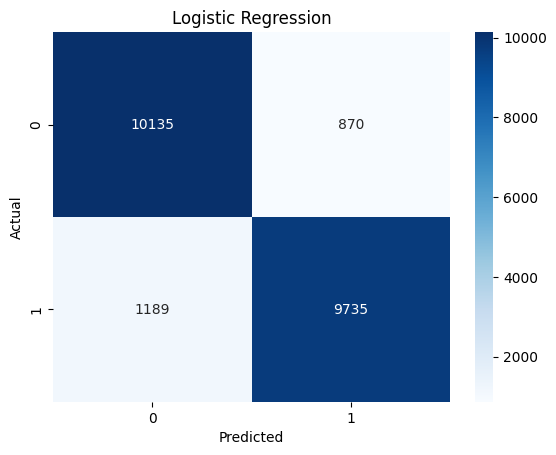

In [ ]:
conf_matrix1= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Store the accuracy results
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb
}
model_accuracies = {}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9556295316703908
Confusion Matrix:
[[10400   605]
 [  368 10556]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11005
           1       0.95      0.97      0.96     10924

    accuracy                           0.96     21929
   macro avg       0.96      0.96      0.96     21929
weighted avg       0.96      0.96      0.96     21929



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.9350175566601304
Confusion Matrix:
[[10043   962]
 [  463 10461]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11005
           1       0.92      0.96      0.94     10924

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.93     21929
weighted avg       0.94      0.94      0.93     21929



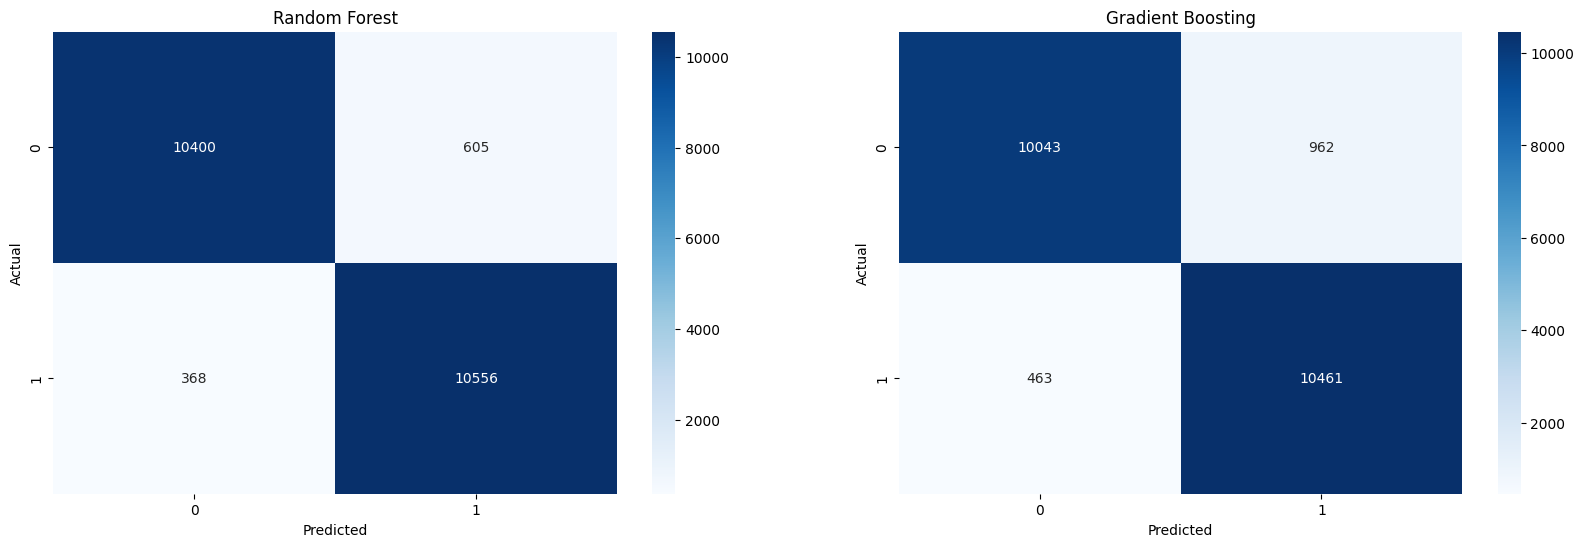

In [ ]:
#Visulaize the models
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.show()
